# **1. Data Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", UserWarning)

## 1.1 Dataset Preparing

In [ ]:
# Dataset Serangan
df_serangan = pd.read_csv('/content/drive/MyDrive/Keamanan Jaringan/Sample/DDoSSample.csv')
df_serangan

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.16.0.5-192.168.50.4-648-36278-17,172.16.0.5,648,192.168.50.4,36278,17,2018-11-03 10:09:06.268205,2,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1,172.16.0.5-192.168.50.4-523-57009-17,172.16.0.5,523,192.168.50.4,57009,17,2018-11-03 10:24:36.836500,1,2,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
2,172.16.0.5-192.168.50.4-512-50419-17,172.16.0.5,512,192.168.50.4,50419,17,2018-11-03 10:24:07.986470,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
3,172.16.0.5-192.168.50.4-879-1336-17,172.16.0.5,879,192.168.50.4,1336,17,2018-11-03 10:26:42.139717,1,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,172.16.0.5-192.168.50.4-552-31152-17,172.16.0.5,552,192.168.50.4,31152,17,2018-11-03 10:27:12.543031,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,172.16.0.5-192.168.50.4-50942-13067-17,172.16.0.5,50942,192.168.50.4,13067,17,2018-11-03 10:55:13.011380,217235,6,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599996,172.16.0.5-192.168.50.4-35551-2892-17,172.16.0.5,35551,192.168.50.4,2892,17,2018-11-03 11:01:04.846545,107136,4,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599997,172.16.0.5-192.168.50.4-45665-17155-17,172.16.0.5,45665,192.168.50.4,17155,17,2018-11-03 10:57:27.078767,1,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599998,172.16.0.5-192.168.50.4-56342-24772-17,172.16.0.5,56342,192.168.50.4,24772,17,2018-11-03 11:00:22.949619,105829,4,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


In [ ]:
columns = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']

In [ ]:
df_serangan.columns = columns
df_serangan

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.16.0.5-192.168.50.4-648-36278-17,172.16.0.5,648,192.168.50.4,36278,17,2018-11-03 10:09:06.268205,2,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1,172.16.0.5-192.168.50.4-523-57009-17,172.16.0.5,523,192.168.50.4,57009,17,2018-11-03 10:24:36.836500,1,2,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
2,172.16.0.5-192.168.50.4-512-50419-17,172.16.0.5,512,192.168.50.4,50419,17,2018-11-03 10:24:07.986470,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
3,172.16.0.5-192.168.50.4-879-1336-17,172.16.0.5,879,192.168.50.4,1336,17,2018-11-03 10:26:42.139717,1,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,172.16.0.5-192.168.50.4-552-31152-17,172.16.0.5,552,192.168.50.4,31152,17,2018-11-03 10:27:12.543031,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,172.16.0.5-192.168.50.4-50942-13067-17,172.16.0.5,50942,192.168.50.4,13067,17,2018-11-03 10:55:13.011380,217235,6,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599996,172.16.0.5-192.168.50.4-35551-2892-17,172.16.0.5,35551,192.168.50.4,2892,17,2018-11-03 11:01:04.846545,107136,4,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599997,172.16.0.5-192.168.50.4-45665-17155-17,172.16.0.5,45665,192.168.50.4,17155,17,2018-11-03 10:57:27.078767,1,2,0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
599998,172.16.0.5-192.168.50.4-56342-24772-17,172.16.0.5,56342,192.168.50.4,24772,17,2018-11-03 11:00:22.949619,105829,4,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


In [ ]:
# Dataset Normal
df_normal = pd.read_csv('/content/drive/MyDrive/Keamanan Jaringan/Sample/NormalSample.csv')
df_normal

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.1.104-192.168.5.122-15837-22-6,192.168.1.104,15837,192.168.5.122,22,6,2010-06-12 03:01:06,11252489,26,61,...,0,42720.0,0.000000e+00,42720.0,42720.0,5018174.0,0.000000e+00,5018174.0,5018174.0,Benign
1,192.168.1.101-192.168.5.122-4175-22-6,192.168.1.101,4175,192.168.5.122,22,6,2010-06-12 03:01:06,5227222,14,39,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
2,192.168.4.121-192.168.5.122-51061-22-6,192.168.4.121,51061,192.168.5.122,22,6,2010-06-12 03:01:06,9249484,17,45,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
3,192.168.2.110-212.227.0.82-3914-80-6,192.168.2.110,3914,212.227.0.82,80,6,2010-06-12 03:01:06,2515425,1,1,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
4,192.168.4.121-65.54.81.171-51062-80-6,192.168.4.121,51062,65.54.81.171,80,6,2010-06-12 03:01:06,3826588,3,5,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248891,192.168.2.113-192.168.5.122-3029-53-17,192.168.2.113,3029,192.168.5.122,53,17,2010-06-13 12:59:40,105961707,4,11,...,0,1538732.5,2.173578e+06,3075684.0,1781.0,51435282.5,6.412027e+07,96775159.0,6095406.0,Benign
248892,192.168.2.113-63.245.209.72-3939-443-6,192.168.2.113,3939,63.245.209.72,443,6,2010-06-13 12:59:40,14627619,20,33,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
248893,184.51.176.80-192.168.2.110-80-1247-6,192.168.2.110,1247,184.51.176.80,80,6,2010-06-13 12:59:43,19139633,1,1,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
248894,192.168.4.255-192.168.4.119-138-138-17,192.168.4.119,138,192.168.4.255,138,17,2010-06-13 12:59:47,74402759,1,1,...,0,0.0,0.000000e+00,0.0,0.0,74402759.0,0.000000e+00,74402759.0,74402759.0,Benign


In [ ]:
# Dataset Final
final = [df_serangan, df_normal]
df_final = pd.concat(final).drop_duplicates().reset_index(drop=True)
df_final

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.16.0.5-192.168.50.4-648-36278-17,172.16.0.5,648,192.168.50.4,36278,17,2018-11-03 10:09:06.268205,2,2,0,...,8,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
1,172.16.0.5-192.168.50.4-523-57009-17,172.16.0.5,523,192.168.50.4,57009,17,2018-11-03 10:24:36.836500,1,2,0,...,-1,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
2,172.16.0.5-192.168.50.4-512-50419-17,172.16.0.5,512,192.168.50.4,50419,17,2018-11-03 10:24:07.986470,1,2,0,...,1472,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
3,172.16.0.5-192.168.50.4-879-1336-17,172.16.0.5,879,192.168.50.4,1336,17,2018-11-03 10:26:42.139717,1,2,0,...,8,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
4,172.16.0.5-192.168.50.4-552-31152-17,172.16.0.5,552,192.168.50.4,31152,17,2018-11-03 10:27:12.543031,1,2,0,...,14,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848590,192.168.2.113-192.168.5.122-3029-53-17,192.168.2.113,3029,192.168.5.122,53,17,2010-06-13 12:59:40,105961707,4,11,...,0,1538732.5,2.173578e+06,3075684.0,1781.0,51435282.5,6.412027e+07,96775159.0,6095406.0,Benign
848591,192.168.2.113-63.245.209.72-3939-443-6,192.168.2.113,3939,63.245.209.72,443,6,2010-06-13 12:59:40,14627619,20,33,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
848592,184.51.176.80-192.168.2.110-80-1247-6,192.168.2.110,1247,184.51.176.80,80,6,2010-06-13 12:59:43,19139633,1,1,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
848593,192.168.4.255-192.168.4.119-138-138-17,192.168.4.119,138,192.168.4.255,138,17,2010-06-13 12:59:47,74402759,1,1,...,0,0.0,0.000000e+00,0.0,0.0,74402759.0,0.000000e+00,74402759.0,74402759.0,Benign


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Keamanan Jaringan/CICDDoS2019Final.csv', header=True, index=False, encoding='utf-8')

## 1.2 Dataset Info

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848595 entries, 0 to 848594
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            848595 non-null  object 
 1   Src IP             848595 non-null  object 
 2   Src Port           848595 non-null  int64  
 3   Dst IP             848595 non-null  object 
 4   Dst Port           848595 non-null  int64  
 5   Protocol           848595 non-null  int64  
 6   Timestamp          848595 non-null  object 
 7   Flow Duration      848595 non-null  int64  
 8   Tot Fwd Pkts       848595 non-null  int64  
 9   Tot Bwd Pkts       848595 non-null  int64  
 10  TotLen Fwd Pkts    848595 non-null  float64
 11  TotLen Bwd Pkts    848595 non-null  float64
 12  Fwd Pkt Len Max    848595 non-null  float64
 13  Fwd Pkt Len Min    848595 non-null  float64
 14  Fwd Pkt Len Mean   848595 non-null  float64
 15  Fwd Pkt Len Std    848595 non-null  float64
 16  Bw

In [ ]:
df_final.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,848595.000000,848595.000000,848595.000000,8.485950e+05,848595.000000,848595.000000,8.485950e+05,8.485950e+05,848595.000000,848595.000000,...,848595.000000,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05,8.485950e+05
mean,17953.879417,23982.028136,11.955466,4.828128e+06,4.708151,4.693341,8.556756e+02,4.608384e+03,288.701336,266.940367,...,1.704381,-1.343266e+07,3.186142e+04,1.514641e+04,4.908411e+04,2.152534e+04,1.281318e+06,1.844651e+05,1.476822e+06,1.117309e+06
std,21864.027588,21681.799149,5.487511,1.823025e+07,175.382512,123.254138,2.516050e+04,1.662144e+05,448.255629,440.552644,...,19.676939,1.187317e+08,6.479683e+05,3.644795e+05,8.796547e+05,5.657148e+05,8.646343e+06,1.541507e+06,9.159876e+06,8.397099e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,780.000000,612.000000,6.000000,1.000000e+00,2.000000,0.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3282.000000,20377.000000,17.000000,4.700000e+01,2.000000,0.000000,4.220000e+02,0.000000e+00,211.000000,17.000000,...,1.000000,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,38218.000000,43245.000000,17.000000,1.067550e+05,2.000000,2.000000,7.500000e+02,1.200000e+01,369.000000,265.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,65535.000000,17.000000,1.199999e+08,86866.000000,29695.000000,6.307840e+06,4.092149e+07,4030.000000,4030.000000,...,5913.000000,6.724045e+07,1.032142e+08,6.590676e+07,1.032142e+08,1.032142e+08,1.199990e+08,7.539786e+07,1.199990e+08,1.199990e+08


In [ ]:
df_final['Label'].value_counts()

DDoS      595547
Benign    253048
Name: Label, dtype: int64

# **2. Data Pre-Processing**

## 2.1 Exploratory Data Analyst

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


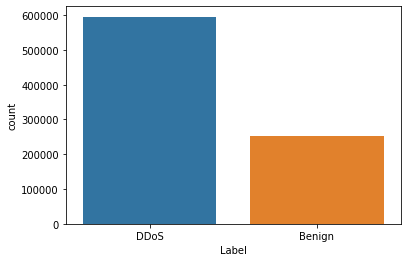

In [ ]:
  # Perbandingan Data Serangan
  label_dict = dict(df_final.Label.value_counts())
  sns.countplot(df_final.Label)

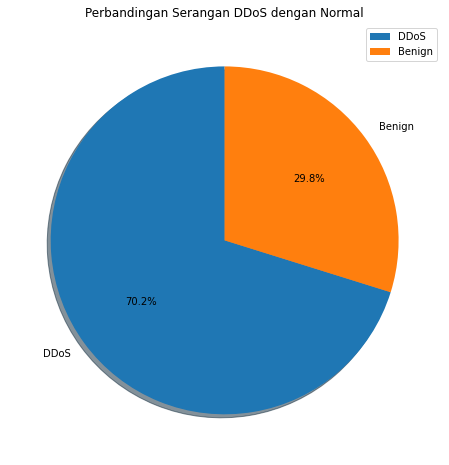

In [ ]:
# Perbandingan Data Serangan Normal vs DDoS
labels = ['DDoS', 'Benign']
sizes = [dict(df_final.Label.value_counts())['DDoS'], dict(df_final.Label.value_counts())['Benign']]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(['DDoS', 'Benign'])
plt.title('Perbandingan Serangan DDoS dengan Normal')
plt.show()

## 2.2 Data Cleaning

In [ ]:
# Handling Missing Value
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df_final.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
df_final.dropna(inplace=True)
df_final.shape

26943 rows with at least one NaN to remove


(821652, 84)

In [ ]:
# Handling Data Duplicated
print(df_final.duplicated().sum(), "fully duplicate rows to remove")
df_final.drop_duplicates(inplace=True)
df_final.reset_index(inplace=True, drop=True)
df_final.shape

0 fully duplicate rows to remove


(821652, 84)

## 2.3 Feature Selection with Principal Component Analysis

In [ ]:
# Drop Column
df_final = df_final.drop(columns=["Flow ID", "Src IP", "Src Port", "Dst IP","Dst Port","Timestamp"])
df_final

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,2,2,0,422.0,0.0,211.0,211.0,211.00,0.000000,...,8,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
1,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.00,0.000000,...,-1,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.00,0.000000,...,1472,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.00,0.000000,...,8,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.00,0.000000,...,14,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821647,17,105961707,4,11,141.0,4270.0,38.0,32.0,35.25,2.753785,...,0,1538732.5,2.173578e+06,3075684.0,1781.0,51435282.5,6.412027e+07,96775159.0,6095406.0,Benign
821648,6,14627619,20,33,829.0,34474.0,314.0,0.0,41.45,78.678209,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
821649,6,19139633,1,1,0.0,0.0,0.0,0.0,0.00,0.000000,...,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
821650,17,74402759,1,1,210.0,201.0,210.0,210.0,210.00,0.000000,...,0,0.0,0.000000e+00,0.0,0.0,74402759.0,0.000000e+00,74402759.0,74402759.0,Benign


In [ ]:
# Encoding Label
df_final['Label'] = df_final['Label'].astype('category')
df_final['Label'] = df_final['Label'].cat.codes

### 2.3.1 Oversampling for Imbalanced with SMOTE

In [ ]:
# Install and Import Python Libraries
!pip install -U imbalanced-learn

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversampling and under sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 18.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
# Check the target distribution
df_final['Label'].value_counts(normalize = True)

1    0.692087
0    0.307913
Name: Label, dtype: float64

In [ ]:
# Make X, y variable
X = df_final.drop(columns=['Label'], axis=1)
y = df_final[['Label']]

In [ ]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the number of records after over sampling
print(sorted(Counter(y_smote).items()))

[('Label', 1)]


In [ ]:
print("Data sebelum di SMOTE", X_smote.shape, y_smote.shape)
print("Data setelah di SMOTE", X_smote.shape, y_smote.shape)

Data sebelum di SMOTE (1137310, 77) (1137310, 1)
Data setelah di SMOTE (1137310, 77) (1137310, 1)


In [ ]:
y_smote['Label'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Label, dtype: float64

In [ ]:
y_smote['Label'].value_counts()

1    568655
0    568655
Name: Label, dtype: int64

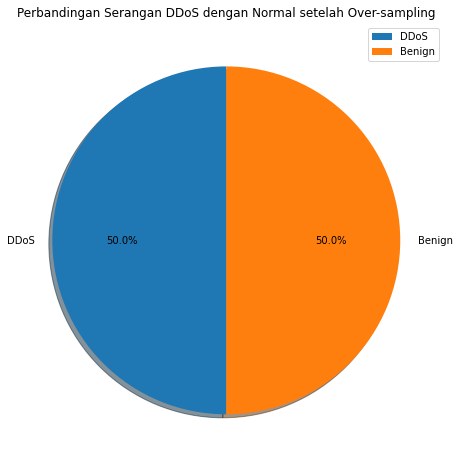

In [ ]:
# Perbandingan Data Serangan Normal vs DDoS setelah melewati Metode Over-Sampling
labels = ['DDoS', 'Benign']
sizes = [dict(y_smote.Label.value_counts())[1], dict(y_smote.Label.value_counts())[0]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(['DDoS', 'Benign'])
plt.title('Perbandingan Serangan DDoS dengan Normal setelah Over-sampling')
plt.show()

In [ ]:
# Feature Selection with PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()

X_pca = sc.fit_transform(X_smote)
# X_test = sc.transform(X_test)

In [ ]:
X_pca

array([[ 1.11989945, -0.31545291, -0.02325636, ..., -0.11504057,
        -0.17845247, -0.15353755],
       [ 1.11989945, -0.31545295, -0.02325636, ..., -0.11504057,
        -0.17845247, -0.15353755],
       [ 1.11989945, -0.31545295, -0.02325636, ..., -0.11504057,
        -0.17845247, -0.15353755],
       ...,
       [-0.89124829, -0.29374612, -0.02325636, ..., -0.11504057,
        -0.17845247, -0.15353755],
       [-0.89124829, -0.2590788 , -0.01715824, ..., -0.11504057,
        -0.17845247, -0.15353755],
       [-0.89124829, -0.18160206, -0.02935448, ..., -0.11504057,
        -0.17845247, -0.15353755]])

In [ ]:
# Feature Selection
pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_pca)
# X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.15275399 0.12290177 0.1016543  0.08158821 0.04996097]
[[-1.95224995e-01  1.98271178e-01  2.63498354e-02  4.38518333e-02
  -2.82086739e-03  4.07339064e-02 -2.01103812e-01 -2.26561576e-01
  -2.19282260e-01  3.87218440e-02  1.36898403e-01  2.65920515e-02
   1.29237181e-01  1.23526138e-01 -2.22948417e-01 -1.90722098e-01
   9.90208593e-02  1.70340925e-01  1.85431211e-01  5.22133477e-02
   1.61544764e-01  1.29638097e-01  1.39025732e-01  1.50183916e-01
   3.85516665e-02  1.50074152e-01  1.06428486e-01  9.14269065e-02
   1.40486678e-01  8.01994200e-02  3.07900026e-03  5.48483994e-02
  -0.00000000e+00 -0.00000000e+00  4.37898491e-02  4.40428048e-02
  -1.90950806e-01  1.10015917e-02 -2.34548552e-01 -5.30977891e-02
  -1.69580329e-01  1.27049102e-01  9.17884122e-02  3.77023686e-02
   1.20118920e-01  5.89250151e-03  5.48483994e-02  1.02655129e-01
   4.17139771e-03  2.96914901e-03 -0.00000000e+00  1.30071896e-01
  -1.93085749e-01 -2.19282260e-01  1.29237181e-01 -0.00000000e+00

<BarContainer object of 5 artists>

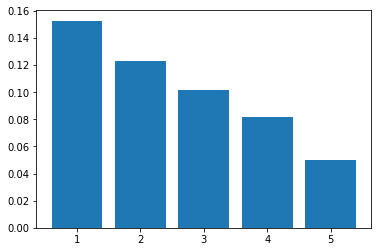

In [ ]:
var = pca.explained_variance_ratio_
plt.bar(range(1, len(var)+1),var)

In [ ]:
import numpy as np

my_array = np.array(pca.components_)

In [ ]:
my_array

array([[-1.95224995e-01,  1.98271178e-01,  2.63498354e-02,
         4.38518333e-02, -2.82086739e-03,  4.07339064e-02,
        -2.01103812e-01, -2.26561576e-01, -2.19282260e-01,
         3.87218440e-02,  1.36898403e-01,  2.65920515e-02,
         1.29237181e-01,  1.23526138e-01, -2.22948417e-01,
        -1.90722098e-01,  9.90208593e-02,  1.70340925e-01,
         1.85431211e-01,  5.22133477e-02,  1.61544764e-01,
         1.29638097e-01,  1.39025732e-01,  1.50183916e-01,
         3.85516665e-02,  1.50074152e-01,  1.06428486e-01,
         9.14269065e-02,  1.40486678e-01,  8.01994200e-02,
         3.07900026e-03,  5.48483994e-02, -0.00000000e+00,
        -0.00000000e+00,  4.37898491e-02,  4.40428048e-02,
        -1.90950806e-01,  1.10015917e-02, -2.34548552e-01,
        -5.30977891e-02, -1.69580329e-01,  1.27049102e-01,
         9.17884122e-02,  3.77023686e-02,  1.20118920e-01,
         5.89250151e-03,  5.48483994e-02,  1.02655129e-01,
         4.17139771e-03,  2.96914901e-03, -0.00000000e+0

In [ ]:
pc1 = [-1.95224995e-01,  1.98271178e-01,  2.63498354e-02,
         4.38518333e-02, -2.82086739e-03,  4.07339064e-02,
        -2.01103812e-01, -2.26561576e-01, -2.19282260e-01,
         3.87218440e-02,  1.36898403e-01,  2.65920515e-02,
         1.29237181e-01,  1.23526138e-01, -2.22948417e-01,
        -1.90722098e-01,  9.90208593e-02,  1.70340925e-01,
         1.85431211e-01,  5.22133477e-02,  1.61544764e-01,
         1.29638097e-01,  1.39025732e-01,  1.50183916e-01,
         3.85516665e-02,  1.50074152e-01,  1.06428486e-01,
         9.14269065e-02,  1.40486678e-01,  8.01994200e-02,
         3.07900026e-03,  5.48483994e-02, -0.00000000e+00,
        -0.00000000e+00,  4.37898491e-02,  4.40428048e-02,
        -1.90950806e-01,  1.10015917e-02, -2.34548552e-01,
        -5.30977891e-02, -1.69580329e-01,  1.27049102e-01,
         9.17884122e-02,  3.77023686e-02,  1.20118920e-01,
         5.89250151e-03,  5.48483994e-02,  1.02655129e-01,
         4.17139771e-03,  2.96914901e-03, -0.00000000e+00,
         1.30071896e-01, -1.93085749e-01, -2.19282260e-01,
         1.29237181e-01, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  2.63498354e-02, -2.82128218e-03,
         4.38518333e-02,  4.07338544e-02,  2.98456756e-02,
         1.06519855e-01,  1.61712782e-02,  4.67048243e-02,
         5.55124520e-02,  4.06436890e-02,  5.86188277e-02,
         4.50520296e-02,  1.55091642e-01,  7.12286233e-02,
         1.59538787e-01,  1.48524186e-01]
pc2 = [ 6.51401841e-02,  1.38740975e-01,  5.32871166e-02,
         8.24335680e-02,  2.84304188e-02,  7.80626187e-02,
         2.29481532e-01,  2.06999810e-01,  2.16576909e-01,
         8.12343274e-02,  1.60059764e-01,  2.02421164e-02,
         1.64711292e-01,  1.40288941e-01,  1.88278444e-01,
         4.98648281e-02,  1.45172726e-02,  1.34642614e-01,
         1.23359288e-01, -2.30645830e-02,  1.47265757e-01,
         1.05265962e-01,  1.17413110e-01,  1.38722136e-01,
         3.65989263e-02,  1.44262317e-01,  8.81998897e-02,
         7.85741941e-02,  1.24934722e-01,  6.59556801e-02,
        -6.77575831e-03,  9.99626988e-03,  0.00000000e+00,
         0.00000000e+00, -3.17581363e-02,  8.26920466e-02,
         5.21540916e-02, -4.66852723e-02,  1.93491387e-01,
         2.91637876e-01,  2.72468449e-01,  1.77109419e-01,
         1.65363921e-01, -7.05654215e-02,  1.15903197e-01,
        -3.53861381e-02,  9.99626988e-03, -1.48584880e-01,
        -1.50340179e-02, -1.23133789e-02,  0.00000000e+00,
         1.54140099e-02,  2.56423005e-01,  2.16576909e-01,
         1.64711292e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.32871166e-02,  2.84300236e-02,
         8.24335680e-02,  7.80625756e-02, -9.35125702e-02,
        -2.08789395e-02,  4.05533673e-02, -3.43062763e-02,
         6.98981260e-02,  4.80469364e-02,  7.18300301e-02,
         5.77852683e-02,  1.24252561e-01,  5.86026660e-02,
         1.27914262e-01,  1.19090457e-01]
pc3 = [-6.84281801e-02, -1.52164778e-01,  7.76833469e-02,
         1.20231499e-01,  2.30758687e-02,  1.15340627e-01,
        -5.41035978e-02, -8.03844994e-02, -7.23309062e-02,
         4.79234548e-02,  2.45971887e-01, -3.77086371e-03,
         2.31204613e-01,  2.35652053e-01, -7.57283428e-02,
        -8.60767147e-02, -1.27036348e-01, -2.13797190e-01,
        -1.63032470e-01, -5.86483217e-02, -7.33944942e-02,
        -1.39343239e-01, -1.16611755e-01, -8.05676514e-02,
        -5.09744534e-02, -1.14366897e-01, -1.80017619e-01,
        -1.01308706e-01, -1.60978932e-01, -1.52146528e-01,
        -4.95331974e-03, -6.48712543e-02,  0.00000000e+00,
         0.00000000e+00,  1.67962870e-02,  1.20827323e-01,
        -8.59604719e-02,  6.52800675e-04, -8.18162899e-02,
         1.46666708e-01,  3.31908936e-02,  2.38898292e-01,
         1.95377201e-01, -2.50111813e-02,  2.20142712e-01,
         1.97432535e-03, -6.48712543e-02, -9.60634568e-02,
        -1.71334509e-03,  2.19497895e-03,  0.00000000e+00,
         1.50888036e-01,  1.25871551e-03, -7.23309062e-02,
         2.31204613e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.76833469e-02,  2.30753464e-02,
         1.20231499e-01,  1.15340553e-01, -4.10556770e-02,
         1.16152552e-02,  3.46799841e-02,  1.78442776e-02,
         1.43366789e-02,  3.22891679e-03,  1.09498659e-02,
         1.43854935e-02, -2.28994719e-01, -7.28465679e-02,
        -2.30442810e-01, -2.23594361e-01]
pc4 = [ 3.12079065e-02,  1.63213191e-02,  2.60647125e-01,
         3.71550863e-01,  9.17073397e-02,  3.60790223e-01,
        -1.60571566e-02, -2.16958646e-04, -5.46310956e-03,
        -5.55359029e-02, -1.34306282e-01, -1.17560234e-02,
        -1.04326335e-01, -1.49914330e-01,  6.25165110e-03,
         4.74954576e-02,  1.57373538e-02, -4.31015952e-03,
        -1.21651118e-02,  1.39731938e-02,  8.53764803e-03,
        -1.64280104e-02, -2.72669253e-02, -3.44854428e-02,
        -4.00106741e-03,  5.26775245e-02,  1.66458564e-02,
        -1.22098297e-04,  8.13745021e-03,  1.72800070e-02,
         4.28656365e-03,  5.89972146e-03,  0.00000000e+00,
         0.00000000e+00, -3.89473743e-03,  3.71144346e-01,
         4.69075278e-02,  9.93221934e-03,  7.24586207e-03,
        -1.12954067e-01, -4.47695514e-02, -1.33393868e-01,
        -1.15429553e-01,  2.02146286e-02, -1.24677177e-01,
         7.38865492e-03,  5.89972146e-03,  5.76145166e-02,
         4.72711955e-03,  1.93356899e-03,  0.00000000e+00,
        -8.28398457e-02, -3.26227112e-02, -5.46310956e-03,
        -1.04326335e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.60647125e-01,  9.17076422e-02,
         3.71550863e-01,  3.60790276e-01,  4.06374600e-02,
        -5.77267924e-03,  1.14175795e-01, -3.95019412e-03,
         4.58056199e-02,  2.62091655e-02,  4.46346541e-02,
         4.04316526e-02,  1.44238471e-02,  7.73715536e-03,
         1.51420858e-02,  1.35543990e-02]
pc5 = [ 5.88526533e-03,  1.05596287e-01,  7.66403109e-03,
         7.09364980e-03, -1.96446366e-03,  8.89896008e-03,
        -1.24625900e-02,  9.80655694e-03, -1.70172656e-03,
        -7.76391207e-02, -1.22294827e-02,  8.99371526e-02,
         3.91661316e-03, -2.57771201e-02,  2.31967759e-02,
         2.13800722e-02,  2.15911812e-02, -2.73172106e-02,
         1.02331008e-01,  5.23122798e-02,  2.83779588e-01,
         3.31423498e-01,  3.35526777e-01,  3.24449106e-01,
         1.20391956e-01, -2.69618550e-01, -3.52881377e-01,
        -1.77471997e-01, -3.14949223e-01, -3.06543882e-01,
        -4.26575968e-03,  1.84740327e-01,  0.00000000e+00,
         0.00000000e+00, -6.52512959e-03,  6.99418913e-03,
         2.10091905e-02,  6.55830534e-03,  3.10613709e-02,
        -2.48612184e-02,  1.19343276e-02, -5.40459729e-02,
        -6.32809074e-02, -1.84561421e-02, -2.34141089e-02,
        -8.52973218e-03,  1.84740327e-01,  1.02079615e-02,
        -6.90794728e-03, -5.50921571e-03,  0.00000000e+00,
        -7.93978967e-02,  1.55742895e-02, -1.70172656e-03,
         3.91661316e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.66403109e-03, -1.96438943e-03,
         7.09364980e-03,  8.89896772e-03,  7.55953284e-03,
         1.43651486e-02, -2.35509628e-03, -6.89942014e-03,
        -2.83856961e-02, -1.72433113e-02, -2.76430550e-02,
        -2.44980590e-02, -7.88196050e-02,  8.17630474e-02,
        -6.21693072e-02, -9.20121469e-02]
Feature = X.columns

In [ ]:
pcs = pd.DataFrame({'Feature': Feature,
                    'PC 1': pc1,
                    'PC 2': pc2,
                    'PC 3': pc3,
                    'PC 4': pc4,
                    'PC 5': pc5})
pcs

,Feature,PC 1,PC 2,PC 3,PC 4,PC 5
0,Protocol,-0.195225,0.065140,-0.068428,0.031208,0.005885
1,Flow Duration,0.198271,0.138741,-0.152165,0.016321,0.105596
2,Tot Fwd Pkts,0.026350,0.053287,0.077683,0.260647,0.007664
3,Tot Bwd Pkts,0.043852,0.082434,0.120231,0.371551,0.007094
4,TotLen Fwd Pkts,-0.002821,0.028430,0.023076,0.091707,-0.001964
...,...,...,...,...,...,...
72,Active Min,0.045052,0.057785,0.014385,0.040432,-0.024498
73,Idle Mean,0.155092,0.124253,-0.228995,0.014424,-0.078820
74,Idle Std,0.071229,0.058603,-0.072847,0.007737,0.081763
75,Idle Max,0.159539,0.127914,-0.230443,0.015142,-0.062169


In [ ]:
feature_new = X_smote[['Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean',
                       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow IAT Std', 'Pkt Len Min', 'Pkt Len Std',
                       'SYN Flag Cnt', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Idle Mean', 'Idle Max',
                       'Idle Min']]
feature_new

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow IAT Std,Pkt Len Min,Pkt Len Std,SYN Flag Cnt,Fwd Seg Size Avg,Bwd Seg Size Avg,Idle Mean,Idle Max,Idle Min
0,211.000000,211.0,211.000000,0.000000,0.000000,2.110000e+08,0.000000,211.0,0.000000,0,211.000000,0.000000,0.0,0.0,0.0
1,1448.000000,1448.0,1448.000000,0.000000,0.000000,2.896000e+09,0.000000,1448.0,0.000000,0,1448.000000,0.000000,0.0,0.0,0.0
2,1472.000000,1472.0,1472.000000,0.000000,0.000000,2.944000e+09,0.000000,1472.0,0.000000,0,1472.000000,0.000000,0.0,0.0,0.0
3,1472.000000,1472.0,1472.000000,0.000000,0.000000,2.944000e+09,0.000000,1472.0,0.000000,0,1472.000000,0.000000,0.0,0.0,0.0
4,1472.000000,1472.0,1472.000000,0.000000,0.000000,2.944000e+09,0.000000,1472.0,0.000000,0,1472.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137305,76.009413,0.0,5.094461,1274.044513,475.820047,5.038916e+04,28821.157683,0.0,724.587388,1,5.094461,1274.044513,0.0,0.0,0.0
1137306,113.037632,0.0,56.518816,448.497886,698.580374,1.851870e+03,342375.167387,0.0,590.147486,1,56.518816,448.497886,0.0,0.0,0.0
1137307,90.000000,0.0,45.000000,178.200000,398.467314,2.048446e+03,120539.885479,0.0,312.063610,1,45.000000,178.200000,0.0,0.0,0.0
1137308,84.446087,0.0,28.148696,194.431444,388.862889,6.951813e+02,310971.540504,0.0,273.114838,1,28.148696,194.431444,0.0,0.0,0.0


In [ ]:
# Train Test Split for Imbalanced Data
X_train, X_test, y_train, y_test = train_test_split(feature_new, y_smote, test_size=0.2, random_state=42)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 909848
The number of records in the test dataset is 227462


# **3. Modelling**

## 3.1 Modelling without Oversampling for Imbalanced

In [ ]:
# Train the random forest model
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)

# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113924
           1       1.00      1.00      1.00    113538

    accuracy                           1.00    227462
   macro avg       1.00      1.00      1.00    227462
weighted avg       1.00      1.00      1.00    227462



The r-squared score of the model is  0.9976611410607535
The mean squared error is 0.0005847130509711512
The mean accuracy score is 0.0005847130509711512


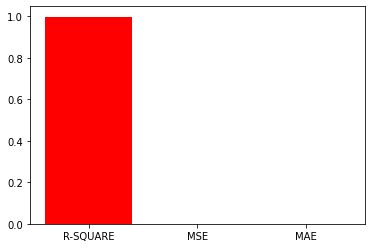

In [ ]:
# Function for estimating r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score,mean_absolute_error, mean_squared_error,accuracy_score

def metrics(y_test,prediction):
    r2 = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    print('The r-squared score of the model is ',r2)
    print('The mean squared error is',mse)
    print('The mean accuracy score is',mae)
    xlabel = ['R-SQUARE', 'MSE', 'MAE']
    ylabel = [r2, mse, mae]
    plt.bar(xlabel, ylabel, color=['red', 'green', 'yellow'])
    plt.show()

metrics(y_test,prediction)

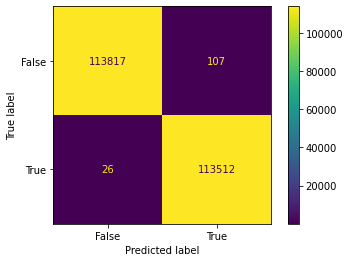

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Accuracy:', accuracy_score(actual, predicted))
print('F1 score:', f1_score(actual, predicted))
print('Recall:', recall_score(actual, predicted))
print('Precision:', precision_score(actual, predicted))

Accuracy: 0.9994152869490288
F1 score: 0.9994145018643493
Recall: 0.99977100177914
Precision: 0.9990582561015323


In [ ]:
# Cek Overfitting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9998953330957707
